In [1]:
#importing pandas and os module (os module is for filename directory reading), and other necessary modules
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
#importing regex
import re

In [2]:
#defining the path of our sales data directory
path = './SalesAnalysis/Sales_Data'
#a list variable containing all the files in the directory
files = os.listdir(path)
#defining an empty dataframe which will contain the sales data of all files
all_months_sales = pd.DataFrame()
#loop for concatenating each index of the list files into one single dataframe
for file in files:
    df = pd.read_csv(path + '/' + file)
    #concatenating each file into the var all_months_data
    all_months_sales = pd.concat([all_months_sales,df])
#reset index
all_months_sales.reset_index()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,1,NaN,NaN,NaN,NaN,NaN,NaN
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...,...
186845,11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [3]:
#getting an overall summary of the new dataframe
all_months_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [4]:
#viewing the dataframe
all_months_sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


# Cleaning the Data

In [5]:
#converting all numeric rows to the numeric type (since all rows are currently strings)
all_months_sales['Quantity Ordered'] = pd.to_numeric(all_months_sales['Quantity Ordered'],errors = 'coerce')
all_months_sales['Price Each'] = pd.to_numeric(all_months_sales['Price Each'],errors = 'coerce')
#coverting the 'Order Date' row to datetime type
all_months_sales['Order Date'] = pd.to_datetime(all_months_sales['Order Date'],errors = 'coerce')

In [6]:
#checking the data types
all_months_sales.dtypes

Order ID                    object
Product                     object
Quantity Ordered           float64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

In [7]:
#drop all rows where the column value of 'Quantity Ordered' is 'NaN'
#if there is no data on the 'Quantity Ordered' column, the row is not needed for our analysis
all_months_sales = all_months_sales.dropna(subset=['Quantity Ordered'])
all_months_sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016"


In [8]:
#checking for duplicate rows
all_months_sales[all_months_sales.duplicated(keep=False)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
30,176585,Bose SoundSport Headphones,1.0,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215"
31,176585,Bose SoundSport Headphones,1.0,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215"
1301,177795,Apple Airpods Headphones,1.0,150.00,2019-04-27 19:45:00,"740 14th St, Seattle, WA 98101"
1302,177795,Apple Airpods Headphones,1.0,150.00,2019-04-27 19:45:00,"740 14th St, Seattle, WA 98101"
1682,178158,USB-C Charging Cable,1.0,11.95,2019-04-28 21:13:00,"197 Center St, San Francisco, CA 94016"
...,...,...,...,...,...,...
11344,259035,27in FHD Monitor,1.0,149.99,2019-09-29 13:52:00,"327 Lake St, San Francisco, CA 94016"
11617,259296,Apple Airpods Headphones,1.0,150.00,2019-09-28 16:48:00,"894 6th St, Dallas, TX 75001"
11618,259296,Apple Airpods Headphones,1.0,150.00,2019-09-28 16:48:00,"894 6th St, Dallas, TX 75001"
11620,259297,Lightning Charging Cable,1.0,14.95,2019-09-15 18:54:00,"138 Main St, Boston, MA 02215"


In [9]:
#drop any duplicate rows
all_months_sales.drop_duplicates(inplace=True)

c:\Users\User\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [10]:
all_months_sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016"


In [11]:
#checking for any rows with a null value
all_months_sales[all_months_sales.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [12]:
#reset index
all_months_sales = all_months_sales.reset_index(drop='True')

In [13]:
#viewing the dataframe
all_months_sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
185681,259353,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001"
185682,259354,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016"
185683,259355,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016"
185684,259356,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016"


The data is now clean

In [14]:
#adding a 'Revenue' column(just the multiplication of 'Quantity Ordered' 'Price Each') between 'Price Each' and 'Order Date' columns
all_months_sales.insert(4,'Revenue',all_months_sales['Quantity Ordered']*all_months_sales['Price Each'])

In [15]:
#viewing the dataframe
all_months_sales

,Order ID,Product,Quantity Ordered,Price Each,Revenue,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2.0,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1.0,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1.0,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1.0,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1.0,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...,...
185681,259353,AAA Batteries (4-pack),3.0,2.99,8.97,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001"
185682,259354,iPhone,1.0,700.00,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016"
185683,259355,iPhone,1.0,700.00,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016"
185684,259356,34in Ultrawide Monitor,1.0,379.99,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016"


In [16]:
#dataframe for all us cities
#the dataset has been downloaded from https://simplemaps.com/data/us-cities
us_cities = pd.read_csv('./OtherDatasets/simplemaps_uscities_basicv1.75/uscities.csv')
us_cities

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,New York,New York,NY,New York,36081,Queens,40.6943,-73.9249,18680025,10768.0,shape,False,True,America/New_York,1,11229 11228 11226 11225 11224 11222 11221 1122...,1840034016
1,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1141,-118.4068,12531334,3267.0,shape,False,True,America/Los_Angeles,1,91367 90291 90293 90292 91316 91311 90035 9003...,1840020491
2,Chicago,Chicago,IL,Illinois,17031,Cook,41.8375,-87.6866,8586888,4576.0,shape,False,True,America/Chicago,1,60018 60649 60641 60640 60643 60642 60645 6064...,1840000494
3,Miami,Miami,FL,Florida,12086,Miami-Dade,25.7840,-80.2101,6076316,4945.0,shape,False,True,America/New_York,1,33128 33129 33125 33126 33127 33149 33144 3314...,1840015149
4,Dallas,Dallas,TX,Texas,48113,Dallas,32.7935,-96.7667,5910669,1522.0,shape,False,True,America/Chicago,1,75098 75287 75230 75231 75236 75237 75235 7525...,1840019440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30404,Drummond,Drummond,ID,Idaho,16043,Fremont,43.9996,-111.3433,1,16.4,shape,False,True,America/Boise,3,83420,1840018609
30405,Lost Springs,Lost Springs,WY,Wyoming,56009,Converse,42.7652,-104.9255,1,3.2,shape,False,True,America/Denver,3,82224 82229,1840021288
30406,Provo,Provo,SD,South Dakota,46047,Fall River,43.1937,-103.8329,1,3.1,shape,False,False,America/Denver,3,57735,1840035958
30407,Goldcreek,Goldcreek,MT,Montana,30077,Powell,46.5838,-112.9284,1,1.9,shape,False,False,America/Denver,3,59733,1840032724


### Using zip code in the 'Purchase Address' column to compare against us_cities 

##### Adding a 'Zip Code' column

In [17]:
#defining an empty 'Zip Code' column for all_months_sales
all_months_sales['Zip Code'] = np.nan
all_months_sales['Zip Code'] = all_months_sales['Zip Code'].astype(str)
# loop through all rows of Purchase Address
for i in range(0,len(all_months_sales['Purchase Address'])):
    #find numerical digits (the zip code) in the address using regex library
    num = re.findall(r'\d+',all_months_sales['Purchase Address'][i])
    #find the digits in the string, we need to loop through all
    #to find the 5-digit zip code
    for digits in num:
        #checking which one is the 5-digit number, thus the zip code
        if len(digits) == 5:
            #zip codes have to be stored as string
            zip = str(digits)
            break
    all_months_sales['Zip Code'][i] = zip
all_months_sales

c:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,Order ID,Product,Quantity Ordered,Price Each,Revenue,Order Date,Purchase Address,Zip Code
0,176558,USB-C Charging Cable,2.0,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",75001
1,176559,Bose SoundSport Headphones,1.0,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",02215
2,176560,Google Phone,1.0,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",90001
3,176560,Wired Headphones,1.0,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",90001
4,176561,Wired Headphones,1.0,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",90001
...,...,...,...,...,...,...,...,...
185681,259353,AAA Batteries (4-pack),3.0,2.99,8.97,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",90001
185682,259354,iPhone,1.0,700.00,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",94016
185683,259355,iPhone,1.0,700.00,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",94016
185684,259356,34in Ultrawide Monitor,1.0,379.99,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",94016


In [18]:
all_months_sales.dtypes

Order ID                    object
Product                     object
Quantity Ordered           float64
Price Each                 float64
Revenue                    float64
Order Date          datetime64[ns]
Purchase Address            object
Zip Code                    object
dtype: object

In [19]:
#finding how many unique zip codes
all_zip_codes = all_months_sales['Zip Code'].unique()
all_zip_codes

array(['75001', '02215', '90001', '94016', '98101', '30301', '10001',
       '97035', '73301', '04101'], dtype=object)

In [20]:
#making a lookup table of all cities corresponding to the zip codes in all_zip_codes array
city_lookup = pd.DataFrame()
#loop through every unique zip code and find matching column in us_cities dataframe
for zip_code in all_zip_codes:
    #selecting all rows with the particular zip code of the array
    city_zip = us_cities.loc[us_cities['zips'].str.contains(zip_code,na=False)]
    city_lookup = pd.concat([city_lookup,city_zip])
city_lookup = city_lookup.reset_index(drop=True)
city_lookup

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,Addison,Addison,TX,Texas,48113,Dallas,32.9590,-96.8355,15428,1368.0,shape,False,True,America/Chicago,3,75254 75001,1840022057
1,Boston,Boston,MA,Massachusetts,25025,Suffolk,42.3188,-71.0852,4465966,5505.0,shape,False,True,America/New_York,1,02120 02121 02122 02124 02125 02126 02127 0212...,1840000455
2,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1141,-118.4068,12531334,3267.0,shape,False,True,America/Los_Angeles,1,91367 90291 90293 90292 91316 91311 90035 9003...,1840020491
3,Florence-Graham,Florence-Graham,CA,California,6037,Los Angeles,33.9682,-118.2447,64787,7127.0,shape,False,True,America/Los_Angeles,2,90001 90002,1840037057
4,Seattle,Seattle,WA,Washington,53033,King,47.6211,-122.3244,3530752,3414.0,shape,False,True,America/Los_Angeles,1,98109 98108 98105 98104 98107 98106 98101 9810...,1840021117
5,New York,New York,NY,New York,36081,Queens,40.6943,-73.9249,18680025,10768.0,shape,False,True,America/New_York,1,11229 11228 11226 11225 11224 11222 11221 1122...,1840034016
6,Manhattan,Manhattan,NY,New York,36061,New York,40.7834,-73.9662,1694263,28653.0,point,False,True,America/New_York,1,10026 10027 10030 10037 10039 10001 10011 1001...,1840034000
7,Lake Oswego,Lake Oswego,OR,Oregon,41005,Clackamas,45.4129,-122.7004,39476,1413.0,shape,False,True,America/Los_Angeles,3,97034 97035,1840019955
8,Rivergrove,Rivergrove,OR,Oregon,41005,Clackamas,45.3851,-122.7330,604,1282.7,shape,False,True,America/Los_Angeles,3,97035,1840019951
9,Portland,Portland,ME,Maine,23005,Cumberland,43.6773,-70.2715,213986,1195.0,shape,False,True,America/New_York,2,04101 04102 04103 04108 04109 04019,1840000327


In [21]:
#changing the lookup values to match the city and state name of the all_months_sales dataframe's ['Purchase Address'] column
city_lookup['city'][0] = 'Dallas'
city_lookup['city'][3] = 'San Francisco'
city_lookup['city'][6] = 'New York'
city_lookup['city'][7] = 'Portland'
city_lookup['city'][8] = 'Austin'
city_lookup['state_id'][8] = 'TX'

c:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the 

In [22]:
#view city_lookup
city_lookup

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,Dallas,Addison,TX,Texas,48113,Dallas,32.9590,-96.8355,15428,1368.0,shape,False,True,America/Chicago,3,75254 75001,1840022057
1,Boston,Boston,MA,Massachusetts,25025,Suffolk,42.3188,-71.0852,4465966,5505.0,shape,False,True,America/New_York,1,02120 02121 02122 02124 02125 02126 02127 0212...,1840000455
2,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1141,-118.4068,12531334,3267.0,shape,False,True,America/Los_Angeles,1,91367 90291 90293 90292 91316 91311 90035 9003...,1840020491
3,San Francisco,Florence-Graham,CA,California,6037,Los Angeles,33.9682,-118.2447,64787,7127.0,shape,False,True,America/Los_Angeles,2,90001 90002,1840037057
4,Seattle,Seattle,WA,Washington,53033,King,47.6211,-122.3244,3530752,3414.0,shape,False,True,America/Los_Angeles,1,98109 98108 98105 98104 98107 98106 98101 9810...,1840021117
5,New York,New York,NY,New York,36081,Queens,40.6943,-73.9249,18680025,10768.0,shape,False,True,America/New_York,1,11229 11228 11226 11225 11224 11222 11221 1122...,1840034016
6,New York,Manhattan,NY,New York,36061,New York,40.7834,-73.9662,1694263,28653.0,point,False,True,America/New_York,1,10026 10027 10030 10037 10039 10001 10011 1001...,1840034000
7,Portland,Lake Oswego,OR,Oregon,41005,Clackamas,45.4129,-122.7004,39476,1413.0,shape,False,True,America/Los_Angeles,3,97034 97035,1840019955
8,Austin,Rivergrove,TX,Oregon,41005,Clackamas,45.3851,-122.7330,604,1282.7,shape,False,True,America/Los_Angeles,3,97035,1840019951
9,Portland,Portland,ME,Maine,23005,Cumberland,43.6773,-70.2715,213986,1195.0,shape,False,True,America/New_York,2,04101 04102 04103 04108 04109 04019,1840000327


#### Adding a 'City' column to all_months_sales according to 'city_lookup' dataframe

In [23]:
#defining an empty dataframe where we will store the city information based on the city_lookup dataframe
sales_data_cities_zip = pd.DataFrame()
#for loop to add 'City' column to sales_data_cities_zip
for i in range(0, len(city_lookup)):
    #a dataframe of all rows containing the zip code in the city_lookup[i] row
    city_df = all_months_sales.loc[all_months_sales['Zip Code']==all_zip_codes[i]]
    city_df['City'] = city_lookup['city'][i] + ' ' + city_lookup['state_id'][i]
    #concatenating the city_df dataframe to the sales_data_cities
    sales_data_cities_zip = pd.concat([sales_data_cities_zip,city_df])
    print(i)
    #comparing to see if the number of rows of sales_data_cities_zip is equal to all_months_data
    #if the number of rows is equal or more, there are no more rows to append to 
    if len(sales_data_cities_zip)>=len(all_months_sales):
        #just to see if it actually reaches break before going through all rows of city_lookup
        print('reached break')
        break

c:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


0
1
2
3
4
5
6
7
8
9
reached break


In [24]:
#view the dataframe
sales_data_cities_zip

,Order ID,Product,Quantity Ordered,Price Each,Revenue,Order Date,Purchase Address,Zip Code,City
0,176558,USB-C Charging Cable,2.0,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",75001,Dallas TX
12,176569,27in 4K Gaming Monitor,1.0,389.99,389.99,2019-04-16 19:23:00,"657 Hill St, Dallas, TX 75001",75001,Dallas TX
13,176570,AA Batteries (4-pack),1.0,3.84,3.84,2019-04-22 15:09:00,"186 12th St, Dallas, TX 75001",75001,Dallas TX
21,176577,Apple Airpods Headphones,1.0,150.00,150.00,2019-04-04 19:25:00,"260 Spruce St, Dallas, TX 75001",75001,Dallas TX
41,176596,Apple Airpods Headphones,1.0,150.00,150.00,2019-04-27 20:11:00,"572 Meadow St, Dallas, TX 75001",75001,Dallas TX
...,...,...,...,...,...,...,...,...,...
185244,258932,AA Batteries (4-pack),1.0,3.84,3.84,2019-09-22 17:45:00,"871 13th St, Portland, ME 04101",04101,Portland ME
185366,259050,USB-C Charging Cable,1.0,11.95,11.95,2019-09-04 18:22:00,"454 Cherry St, Portland, ME 04101",04101,Portland ME
185446,259127,Bose SoundSport Headphones,1.0,99.99,99.99,2019-09-22 12:26:00,"335 Willow St, Portland, ME 04101",04101,Portland ME
185493,259173,Wired Headphones,1.0,11.99,11.99,2019-09-20 11:17:00,"337 Park St, Portland, ME 04101",04101,Portland ME


#### A check to see if the count of each zip code in sales_data_cities_zip is equal to all_months_sales

In [25]:
sales_data_cities_zip.groupby(['Zip Code']).count()

,Order ID,Product,Quantity Ordered,Price Each,Revenue,Order Date,Purchase Address,City
Zip Code,,,,,,,,
02215,19901,19901,19901,19901,19901,19901,19901,19901
04101,2451,2451,2451,2451,2451,2451,2451,2451
10001,24847,24847,24847,24847,24847,24847,24847,24847
30301,14863,14863,14863,14863,14863,14863,14863,14863
73301,9890,9890,9890,9890,9890,9890,9890,9890
75001,14797,14797,14797,14797,14797,14797,14797,14797
90001,29564,29564,29564,29564,29564,29564,29564,29564
94016,44662,44662,44662,44662,44662,44662,44662,44662
97035,9998,9998,9998,9998,9998,9998,9998,9998


In [26]:
all_months_sales.groupby(['Zip Code']).count()

,Order ID,Product,Quantity Ordered,Price Each,Revenue,Order Date,Purchase Address
Zip Code,,,,,,,
02215,19901,19901,19901,19901,19901,19901,19901
04101,2451,2451,2451,2451,2451,2451,2451
10001,24847,24847,24847,24847,24847,24847,24847
30301,14863,14863,14863,14863,14863,14863,14863
73301,9890,9890,9890,9890,9890,9890,9890
75001,14797,14797,14797,14797,14797,14797,14797
90001,29564,29564,29564,29564,29564,29564,29564
94016,44662,44662,44662,44662,44662,44662,44662
97035,9998,9998,9998,9998,9998,9998,9998


# Data Analysis

## Finding out which cities had the highest sale

First, a little black magic to show the numbers using decimal separator commas

In [27]:
pd.options.display.float_format = '{:,.2f}'.format

In [28]:
#city-wise revenue and quantity ordered using the groupby function (grouping by 'City' column)
sales_data_cities_zip.groupby(['City']).sum().sort_values(by='Revenue',ascending=False)[['Quantity Ordered','Revenue']]


,Quantity Ordered,Revenue
City,,
San Francisco CA,"50,169.00","8,254,743.55"
New York NY,"44,487.00","7,456,066.21"
Los Angeles CA,"33,247.00","5,448,304.28"
Boston MA,"22,494.00","3,658,627.65"
Dallas TX,"16,707.00","2,765,373.96"
Seattle WA,"16,534.00","2,745,046.02"
Portland OR,"11,291.00","1,870,010.56"
Austin TX,"11,137.00","1,818,044.33"
Portland ME,"2,746.00","449,321.38"


Text(0.5, 1.0, 'City-wise Sale Data')

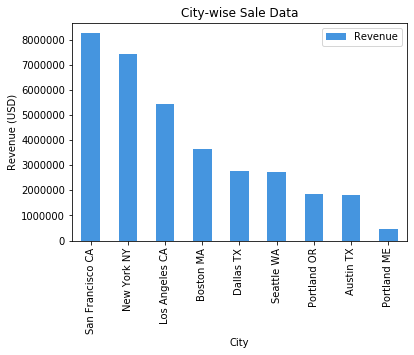

In [29]:
#visualizing the above groupby dataframe (only the 'Revenue' column)
#to specify color using hexadecimal rgb value, use color = '#color_code'
sales_data_cities_zip.groupby(['City']).sum().sort_values(by='Revenue',ascending=False)[['Revenue']].plot(kind='bar',color='#4595DF')
plt.xlabel("City") 
plt.ylabel("Revenue (USD)") 
plt.title("City-wise Sale Data") 

In [74]:
#defining a list of month numbers from the 'Order Date' by separating the month number from the datetime
month_number = all_months_sales['Order Date'].dt.month
#revenue by month, index shows only month number
all_sales_revenue_month = all_months_sales.groupby(month_number).sum()['Revenue']
#for some reason this makes all_sales_revenue_month a Pandas Series instead of a Pandas Dataframe. Thus, converting to a dataframe
all_sales_revenue_month = pd.DataFrame(all_sales_revenue_month)
# #adding a month name column separately in the first [0] position, note this merely copies the index and thus month name is still integer
all_sales_revenue_month.insert(0,'Month Name',all_sales_revenue_month.index)
#converting 'Month Name' column to datetime, and showing the proper month names in stead of month numbers
all_sales_revenue_month['Month Name'] = pd.to_datetime(all_sales_revenue_month['Month Name'], format='%m').dt.month_name()
all_sales_revenue_month

,Month Name,Revenue
Order Date,,
1,January,"1,821,413.16"
2,February,"2,200,078.08"
3,March,"2,804,973.35"
4,April,"3,389,217.98"
5,May,"3,150,616.23"
6,June,"2,576,280.15"
7,July,"2,646,461.32"
8,August,"2,241,083.37"
9,September,"2,094,465.69"


Text(0.5, 1.0, 'Monthly Sales Data for All Cities')

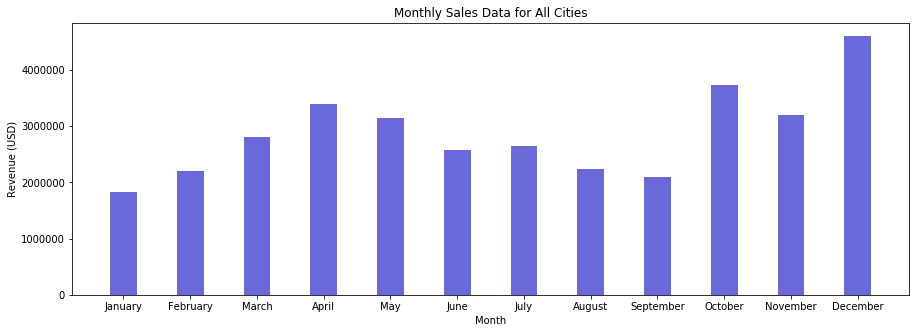

In [75]:
all_monthly_sale_fig = plt.figure(figsize=(15,5))
# creating the bar plot
plt.bar(all_sales_revenue_month['Month Name'], all_sales_revenue_month['Revenue'], color ='#6969D9',width = 0.4)
plt.xlabel("Month") 
plt.ylabel("Revenue (USD)") 
plt.title("Monthly Sales Data for All Cities") 

In [77]:
#pandas series for city-wise monthly sale
all_months_sales_groupby_city = sales_data_cities_zip.groupby('City',month_number).sum()['Revenue']
#converting series to dataframe
all_months_sales_groupby_city = pd.DataFrame(all_months_sales_groupby_city)
#visualizing only the San Francisco sales, the city with the highest revenue, by month
san_francisco_sale_by_month = all_months_sales_groupby_city.loc['San Francisco CA']
#inserting a month_name column to the San Francisco dataaframe
san_francisco_sale_by_month.insert(0,'Month Name',san_francisco_sale_by_month.index)
san_francisco_sale_by_month['Month Name'] = pd.to_datetime(san_francisco_sale_by_month['Month Name'], format='%m').dt.month_name()
# pd.to_datetime(san_francisco_sale_by_month.index,format='%m')
# san_francisco_sale_by_month
san_francisco_sale_by_month.plot(kind='bar',color='#4595DF')

TypeError: unhashable type: 'Series'

In [73]:
# sales_data_cities_zip.groupby(['City','Order Date']).sum()['Revenue']
month_number = all_months_sales['Order Date'].dt.month
test_df = sales_data_cities_zip.groupby(['City',month_number]).sum()['Revenue']
test_df = pd.DataFrame(test_df)
sf_sale = test_df.loc['San Francisco CA']
sf_sale.insert(0,'Month Name',sf_sale.index)
sf_sale['Month Name'] = pd.to_datetime(sf_sale['Month Name'], format='%m').dt.month_name()
sf_sale

,Month Name,Revenue
Order Date,,
1,January,"435,561.39"
2,February,"546,891.60"
3,March,"693,102.14"
4,April,"812,387.30"
5,May,"774,967.54"
6,June,"612,373.49"
7,July,"641,989.89"
8,August,"538,715.31"
9,September,"462,870.03"


In [76]:
all_sales_revenue_month_exp = all_months_sales.groupby(all_months_sales['Order Date'].dt.month_name()).sum()['Revenue']
all_sales_revenue_month_exp.index = all_months_sales['Order Date'].dt.month.unique()
all_sales_revenue_month_exp.index = pd.to_datetime(all_sales_revenue_month_exp.index)
# test_df = all_months_sales['Order Date'].dt.month
# test_df.unique()
all_sales_revenue_month_exp.index.dtype

dtype('<M8[ns]')

### Total revenue in the entire year

In [38]:
#sum of all the 'Revenue' cells in integer format
int(all_months_sales['Revenue'].sum())

34465537

In [43]:
#to show the revenue formatted by commans
"{:,}".format(int(all_months_sales['Revenue'].sum()))

'34,465,537'

### Most in-demand items

In [40]:
#sorting the items ordered the most in order
#the sum of 'Quantity Ordered' and 'Revenue' for each 'Product' (thus, groupby(['Product'])), 
#and then sorting the 'Revenue' value in descending order (highest first)
sales_data_cities_zip.groupby(['Product']).sum()[['Quantity Ordered','Revenue']].sort_values(by='Quantity Ordered',ascending=False)

,Quantity Ordered,Revenue
Product,,
AAA Batteries (4-pack),"30,986.00","92,648.14"
AA Batteries (4-pack),"27,615.00","106,041.60"
USB-C Charging Cable,"23,931.00","285,975.45"
Lightning Charging Cable,"23,169.00","346,376.55"
Wired Headphones,"20,524.00","246,082.76"
Apple Airpods Headphones,"15,637.00","2,345,550.00"
Bose SoundSport Headphones,"13,430.00","1,342,865.70"
27in FHD Monitor,"7,541.00","1,131,074.59"
iPhone,"6,847.00","4,792,900.00"


### Items to bring the highest revenue


In [41]:
#the same code as before, only difference is sorting the 'Quantity Ordered' in descending order
all_months_sales.groupby(['Product']).sum()[['Revenue','Quantity Ordered']].sort_values(by='Revenue',ascending=False)

,Revenue,Quantity Ordered
Product,,
Macbook Pro Laptop,"8,032,500.00","4,725.00"
iPhone,"4,792,900.00","6,847.00"
ThinkPad Laptop,"4,127,958.72","4,128.00"
Google Phone,"3,317,400.00","5,529.00"
27in 4K Gaming Monitor,"2,433,147.61","6,239.00"
34in Ultrawide Monitor,"2,352,898.08","6,192.00"
Apple Airpods Headphones,"2,345,550.00","15,637.00"
Flatscreen TV,"1,443,900.00","4,813.00"
Bose SoundSport Headphones,"1,342,865.70","13,430.00"
